# Project: Accident Dataset Investigation 


# Introduction


Data Description:

**Accident Dataset Investigation**  : Accident Records (2005–2014) This dataset provides comprehensive details about road accidents that occurred between 2005 and 2014, focusing exclusively on incidents that resulted in personal injuries. All accidents included were reported to the police and recorded using the standardized STATS19 accident reporting form. The dataset encompasses a wide range of variables to describe the circumstances of each accident



In [684]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score


df = pd.read_csv(r"C:\Users\Nour Soft\OneDrive\Desktop\data science\python_DS\data_merge.csv")

In [685]:
df1=pd.read_csv("Vehicles.csv")
df2=pd.read_csv("Casualties.csv")
df=pd.merge(df1,df2,on='Accident_Index',how='inner')
print(df.shape)
df.head()

(161471, 16)


,Accident_Index,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity
0,2012521205483,Bus,NaN,Going ahead other,Leaving main road,NaN,Other object,Journey as part of work,Male,21.0,12.0,NaN,Passenger,Female,0.0,survived
1,2012370109312,Motorcycle,NaN,Reversing,Leaving main road,Skidded,Other object,NaN,Male,45.0,16.0,Urban area,Driver,Male,45.0,Died
2,2012120034107,Car,NaN,Going ahead other,Leaving main road,NaN,Other object,Journey as part of work,Female,47.0,19.0,Urban area,Driver,Female,47.0,survived
3,2009360052182,Car,NaN,Going ahead other,Leaving main road,Skidded,Kerb,Other,Female,18.0,15.0,Urban area,Driver,Female,18.0,survived
4,2009360052182,Car,NaN,Going ahead other,Leaving main road,Skidded,Kerb,Other,Female,18.0,15.0,Urban area,Passenger,Male,26.0,Died


In [686]:
df=df.sample(55000,random_state=42)

In [687]:
df.isnull().sum()

Accident_Index                   0
Vehicle_Type                     9
Towing_and_Articulation      54126
Vehicle_Manoeuvre               12
Junction_Location             3786
Skidding_and_Overturning     47025
Hit_Object_in_Carriageway        3
Journey_Purpose_of_Driver    14539
Sex_of_Driver                 2732
Age_of_Driver                 5191
Age_of_Vehicle               14823
Driver_Home_Area_Type         9996
Casualty_Class                   0
Sex_of_Casualty                 19
Age_of_Casualty               1096
Casualty_Severity                0
dtype: int64

In [688]:
df.shape

(55000, 16)

# EDA 

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55000 entries, 22351 to 31203
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Accident_Index             55000 non-null  object 
 1   Vehicle_Type               54991 non-null  object 
 2   Towing_and_Articulation    874 non-null    object 
 3   Vehicle_Manoeuvre          54988 non-null  object 
 4   Junction_Location          51214 non-null  object 
 5   Skidding_and_Overturning   7975 non-null   object 
 6   Hit_Object_in_Carriageway  54997 non-null  object 
 7   Journey_Purpose_of_Driver  40461 non-null  object 
 8   Sex_of_Driver              52268 non-null  object 
 9   Age_of_Driver              49809 non-null  float64
 10  Age_of_Vehicle             40177 non-null  float64
 11  Driver_Home_Area_Type      45004 non-null  object 
 12  Casualty_Class             55000 non-null  object 
 13  Sex_of_Casualty            54981 non-null  obje

In [690]:
df.reset_index(drop=True,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Accident_Index             55000 non-null  object 
 1   Vehicle_Type               54991 non-null  object 
 2   Towing_and_Articulation    874 non-null    object 
 3   Vehicle_Manoeuvre          54988 non-null  object 
 4   Junction_Location          51214 non-null  object 
 5   Skidding_and_Overturning   7975 non-null   object 
 6   Hit_Object_in_Carriageway  54997 non-null  object 
 7   Journey_Purpose_of_Driver  40461 non-null  object 
 8   Sex_of_Driver              52268 non-null  object 
 9   Age_of_Driver              49809 non-null  float64
 10  Age_of_Vehicle             40177 non-null  float64
 11  Driver_Home_Area_Type      45004 non-null  object 
 12  Casualty_Class             55000 non-null  object 
 13  Sex_of_Casualty            54981 non-null  obj

In [691]:
df.describe()

,Age_of_Driver,Age_of_Vehicle,Age_of_Casualty
count,49809.000000,40177.000000,53904.000000
mean,38.747014,7.239988,35.635593
std,15.824580,4.459451,17.802840
min,2.000000,1.000000,0.000000
25%,26.000000,4.000000,21.000000
50%,37.000000,7.000000,33.000000
75%,49.000000,10.000000,47.000000
max,97.000000,87.000000,101.000000


# Data cleaning

In [692]:
df.head(10)

,Accident_Index,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Casualty_Severity
0,201420S033764,Car,NaN,Waiting to go,Mid Junction,NaN,Other object,NaN,Male,36.0,3.0,Urban area,Driver,Female,41.0,survived
1,200601YR90381,Pedal cycle,NaN,Going ahead other,Leaving main road,NaN,Other object,Other,Male,26.0,NaN,NaN,Driver,Male,26.0,survived
2,2010620200381,Car,NaN,Turning right,NaN,NaN,Other object,Other,Female,20.0,11.0,Urban area,Driver,Female,20.0,survived
3,201120S019991,Car,NaN,Going ahead other,Mid Junction,NaN,Other object,NaN,Male,49.0,3.0,Urban area,Passenger,Female,24.0,survived
4,200520G080901,Car,NaN,Going ahead other,Leaving main road,Skidded,Other object,Other,Male,30.0,18.0,NaN,Driver,Male,31.0,survived
5,200732B220407,Car,NaN,Turning right,Leaving main road,NaN,Other object,Other,Male,36.0,13.0,Rural,Driver,Male,36.0,survived
6,201020T035050,Car,NaN,Reversing,Leaving main road,NaN,Kerb,Other,Male,38.0,7.0,Urban area,Pedestrian,Female,49.0,Died
7,200543W283045,Car,NaN,Turning right,Mid Junction,NaN,Other object,Other,Male,54.0,NaN,Urban area,Driver,Female,19.0,survived
8,2014051400359,Car,NaN,Going ahead other,Mid Junction,Overturned,Other object,from work,Male,59.0,2.0,Urban area,Driver,Male,23.0,survived
9,20114100K0168,Van,NaN,U-turn,Leaving main road,NaN,Other object,NaN,Male,NaN,1.0,NaN,Pedestrian,Male,21.0,survived


In [693]:
df.columns=df.columns.str.lower().str.replace(' ','_')
df.head(1)

,accident_index,vehicle_type,towing_and_articulation,vehicle_manoeuvre,junction_location,skidding_and_overturning,hit_object_in_carriageway,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_of_vehicle,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
0,201420S033764,Car,NaN,Waiting to go,Mid Junction,NaN,Other object,NaN,Male,36.0,3.0,Urban area,Driver,Female,41.0,survived


In [694]:
df.drop(['towing_and_articulation','skidding_and_overturning','accident_index'],axis=1,inplace=True)
df['journey_purpose_of_driver'].fillna(df['journey_purpose_of_driver'].mode()[0],inplace=True) 
df.head(1)

C:\Users\Nour Soft\AppData\Local\Temp\ipykernel_9060\2178005682.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['journey_purpose_of_driver'].fillna(df['journey_purpose_of_driver'].mode()[0],inplace=True)


,vehicle_type,vehicle_manoeuvre,junction_location,hit_object_in_carriageway,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_of_vehicle,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
0,Car,Waiting to go,Mid Junction,Other object,Other,Male,36.0,3.0,Urban area,Driver,Female,41.0,survived


In [695]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [696]:
print("Current Number of rows", df.shape[0])
duplicated_rows = sum(df.duplicated())
print("Number of Duplicated rows: ", duplicated_rows)
if(duplicated_rows):
    df.drop_duplicates(keep ='first', inplace=True)
print("New Number of rows after Removing duplication", df.shape[0])

Current Number of rows 31476
Number of Duplicated rows:  715
New Number of rows after Removing duplication 30761


In [697]:
df.isnull().sum()

vehicle_type                 0
vehicle_manoeuvre            0
junction_location            0
hit_object_in_carriageway    0
journey_purpose_of_driver    0
sex_of_driver                0
age_of_driver                0
age_of_vehicle               0
driver_home_area_type        0
casualty_class               0
sex_of_casualty              0
age_of_casualty              0
casualty_severity            0
dtype: int64

In [698]:
df.describe()

,age_of_driver,age_of_vehicle,age_of_casualty
count,30761.000000,30761.000000,30761.000000
mean,39.284061,7.247099,35.933260
std,15.873543,4.481681,18.124501
min,14.000000,1.000000,0.000000
25%,26.000000,4.000000,22.000000
50%,37.000000,7.000000,33.000000
75%,50.000000,10.000000,48.000000
max,96.000000,87.000000,98.000000


In [699]:
df.shape

(30761, 13)

In [700]:
df=df[(df['age_of_driver']>=10)]
df['age_of_driver'] = df['age_of_driver'].astype(int)
df.shape

(30761, 13)

In [701]:
df=df[(df['age_of_vehicle']>=1)]
df['age_of_vehicle'] = df['age_of_vehicle'].astype(int)
df.shape

(30761, 13)

In [702]:
df=df[(df['age_of_casualty']>=1)]
df['age_of_casualty'] = df['age_of_casualty'].astype(int)
df.shape

(30737, 13)

In [703]:
df.describe()

,age_of_driver,age_of_vehicle,age_of_casualty
count,30737.000000,30737.000000,30737.000000
mean,39.284673,7.246348,35.961317
std,15.875144,4.480599,18.103730
min,14.000000,1.000000,1.000000
25%,26.000000,4.000000,22.000000
50%,37.000000,7.000000,33.000000
75%,50.000000,10.000000,48.000000
max,96.000000,87.000000,98.000000


In [704]:
df.head(10)

,vehicle_type,vehicle_manoeuvre,junction_location,hit_object_in_carriageway,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_of_vehicle,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
0,Car,Waiting to go,Mid Junction,Other object,Other,Male,36,3,Urban area,Driver,Female,41,survived
1,Car,Going ahead other,Mid Junction,Other object,Other,Male,49,3,Urban area,Passenger,Female,24,survived
2,Car,Turning right,Leaving main road,Other object,Other,Male,36,13,Rural,Driver,Male,36,survived
3,Car,Reversing,Leaving main road,Kerb,Other,Male,38,7,Urban area,Pedestrian,Female,49,Died
4,Car,Going ahead other,Mid Junction,Other object,from work,Male,59,2,Urban area,Driver,Male,23,survived
5,Car,Slowing or stopping,Leaving main road,Other object,Other,Male,23,4,Urban area,Passenger,Female,22,survived
6,Car,Going ahead other,Approaching junction or waiting,Other object,Other,Male,36,11,Urban area,Driver,Male,36,survived
7,Car,Waiting to go,Leaving main road,Other object,Other,Male,36,7,Urban area,Driver,Male,36,survived
8,Car,Going ahead other,Leaving main road,Other object,Other,Male,37,3,Urban area,Passenger,Female,25,survived
9,Car,Slowing or stopping,Leaving main road,Other object,Other,Female,26,13,Rural,Driver,Female,26,survived


# Correlation between features

In [705]:
df_view=df.copy()

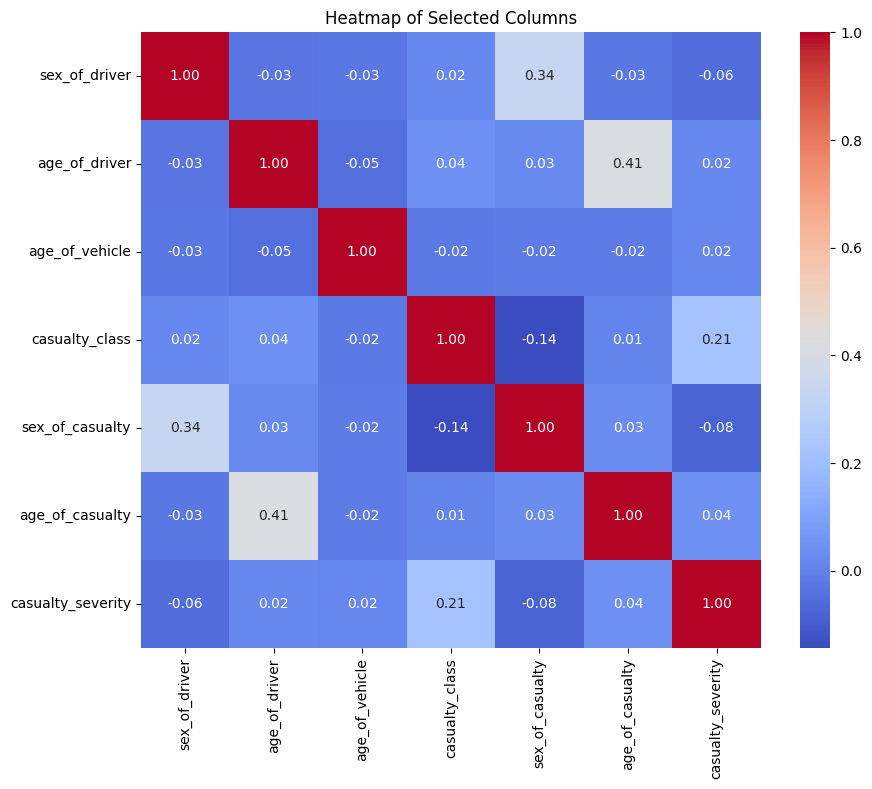

In [706]:
df_view['sex_of_driver'] = df_view['sex_of_driver'].map({'Male': 0, 'Female': 1})
df_view['casualty_class'] = df_view['casualty_class'].map({'Driver': 0, 'Passenger': 1, 'Pedestrian': 2})
df_view['sex_of_casualty'] = df_view['sex_of_casualty'].map({'Male': 0, 'Female': 1})
df_view['casualty_severity'] = df_view['casualty_severity'].map({'survived': 0, 'Died': 1})

selected_columns = ['sex_of_driver', 'age_of_driver', 'age_of_vehicle', 
                    'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'casualty_severity']
numeric_data = df_view[selected_columns]

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Selected Columns')
plt.show()


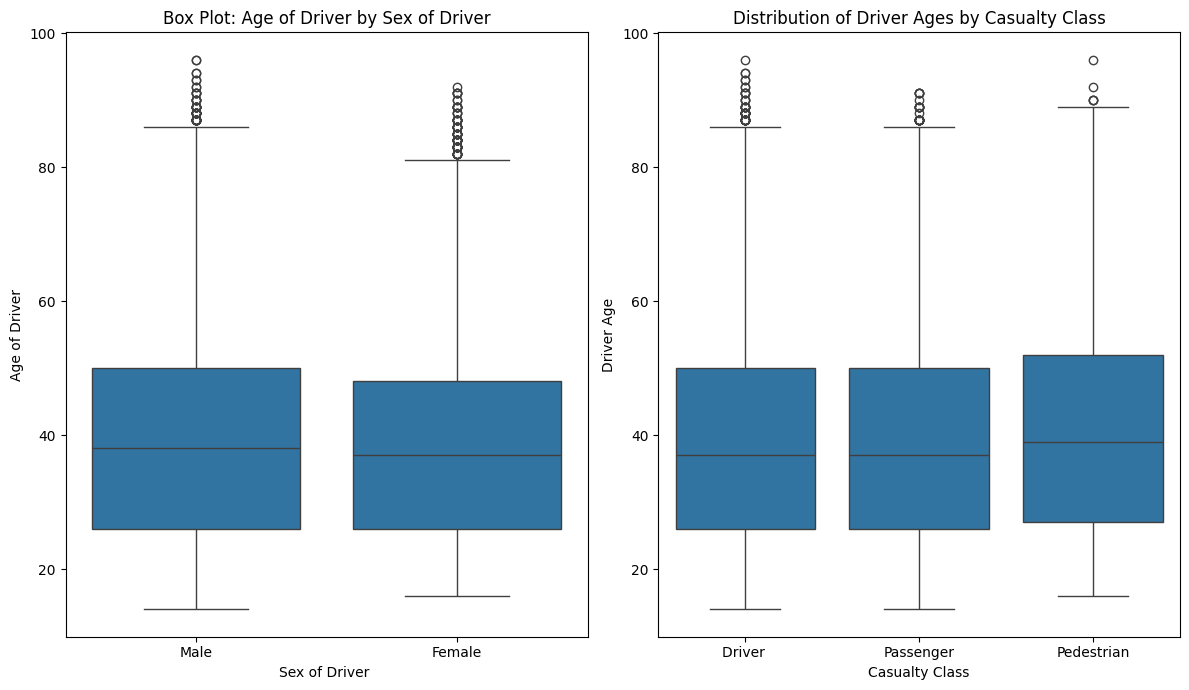

In [707]:
plt.figure(figsize=(12, 7))

plt.subplot(1,2,1)
sns.boxplot(data=df, x='sex_of_driver', y='age_of_driver')
plt.title('Box Plot: Age of Driver by Sex of Driver')
plt.xlabel('Sex of Driver ')
plt.ylabel('Age of Driver')

plt.subplot(1,2,2)
sns.boxplot(x='casualty_class', y='age_of_driver', data=df)
plt.title('Distribution of Driver Ages by Casualty Class')
plt.xlabel('Casualty Class')
plt.ylabel('Driver Age')

plt.tight_layout()
plt.show()

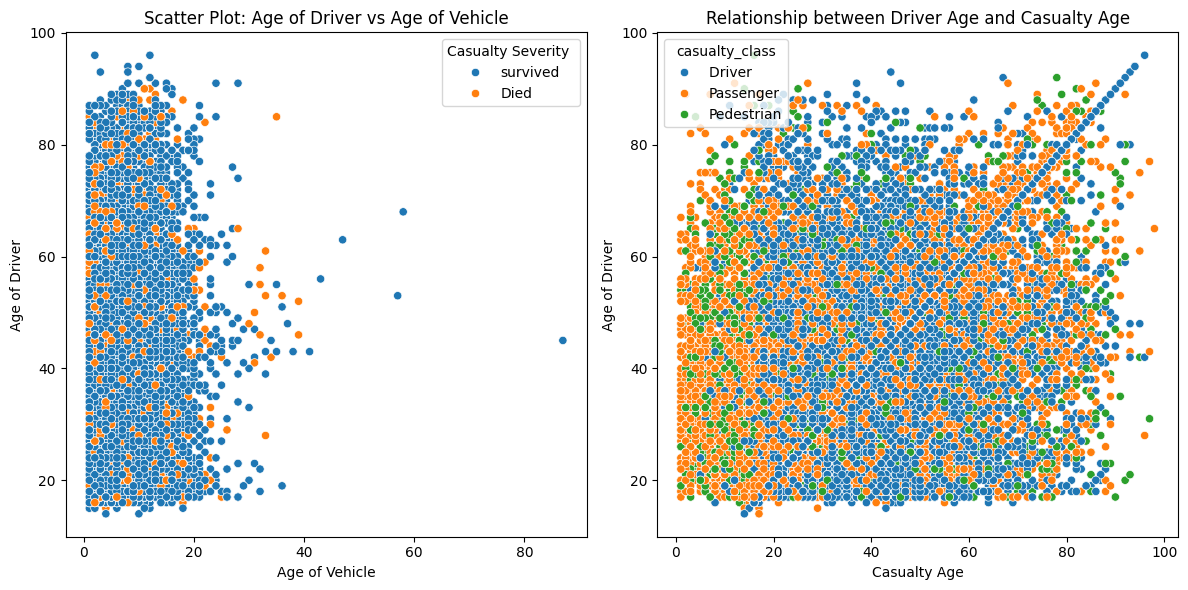

In [708]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='age_of_vehicle', y='age_of_driver', hue='casualty_severity')
plt.title('Scatter Plot: Age of Driver vs Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Age of Driver')
plt.legend(title='Casualty Severity ')

plt.subplot(1,2,2)
sns.scatterplot(x='age_of_casualty', y='age_of_driver', data=df, hue='casualty_class')
plt.title('Relationship between Driver Age and Casualty Age')
plt.xlabel('Casualty Age')
plt.ylabel('Age of Driver')
plt.tight_layout()
plt.show()


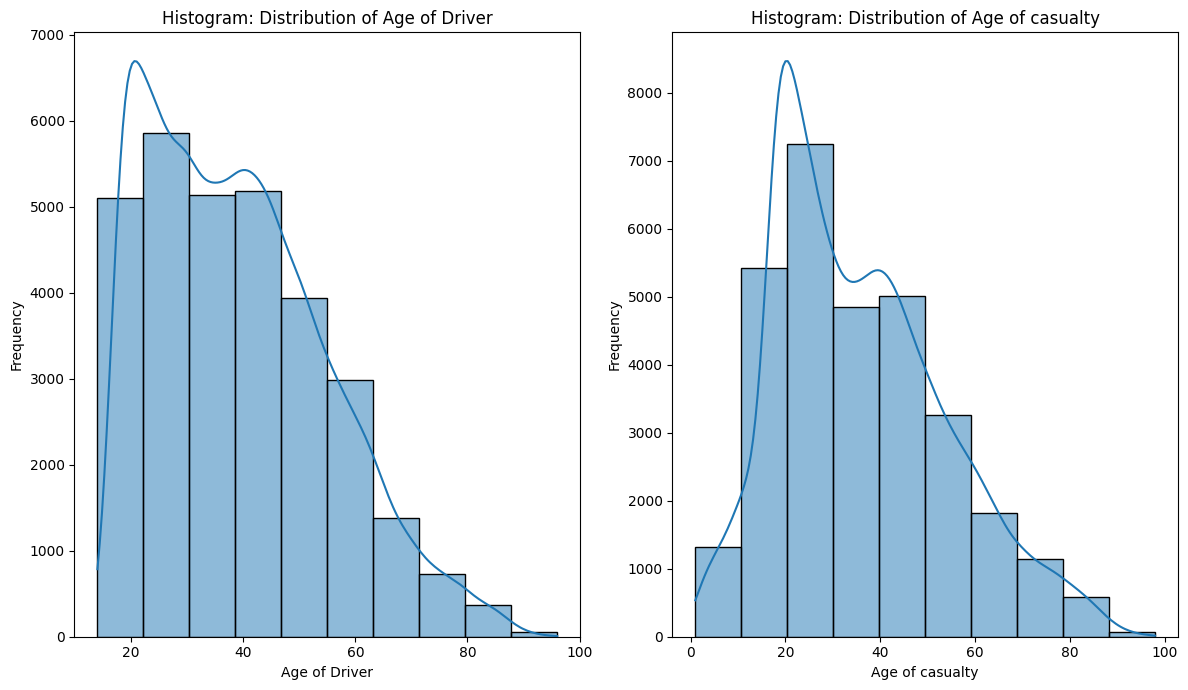

In [709]:
plt.figure(figsize=(12, 7))

plt.subplot(1,2,1)
sns.histplot(data=df, x='age_of_driver', bins=10, kde=True)
plt.title('Histogram: Distribution of Age of Driver')
plt.xlabel('Age of Driver')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(data=df, x='age_of_casualty', bins=10, kde=True)
plt.title('Histogram: Distribution of Age of casualty')
plt.xlabel('Age of casualty')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# View insights from data

## Question 1: Is there a relationship between the driver's gender and the severity of the accident?

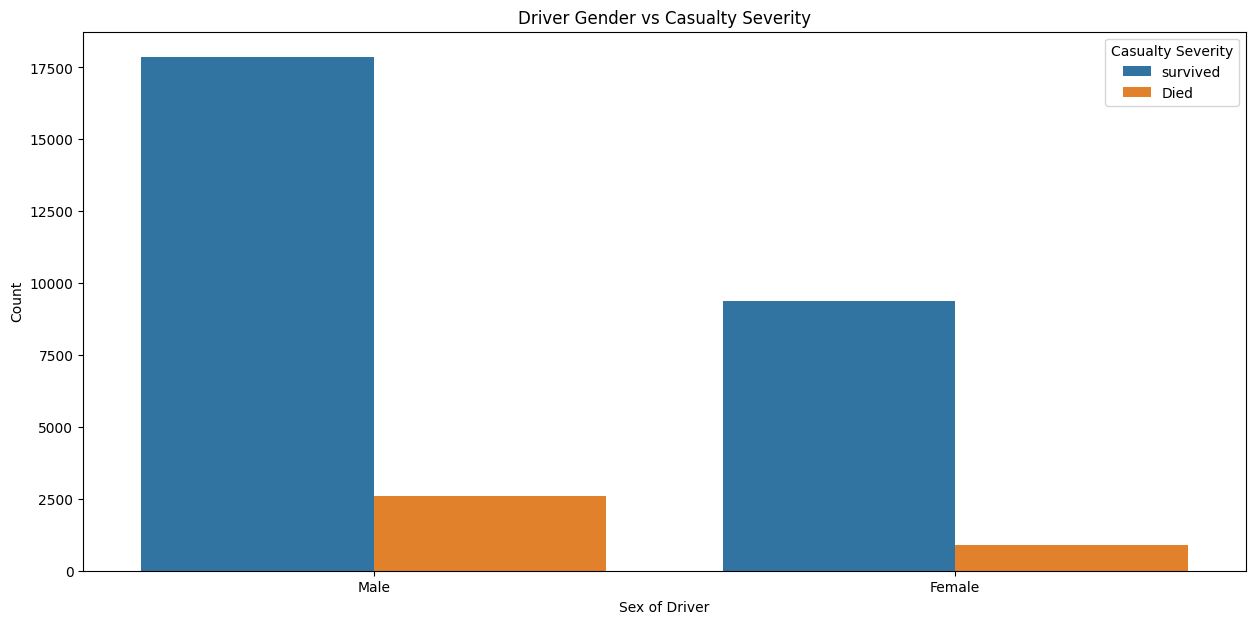

In [710]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='sex_of_driver', hue='casualty_severity')
plt.title('Driver Gender vs Casualty Severity')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')
plt.legend(title='Casualty Severity')
plt.show()


It seems that the number of male drivers is more prone to accidents. There is a need to educate male drivers.

## Question 2: How does the driver's age affect the severity of the injury?

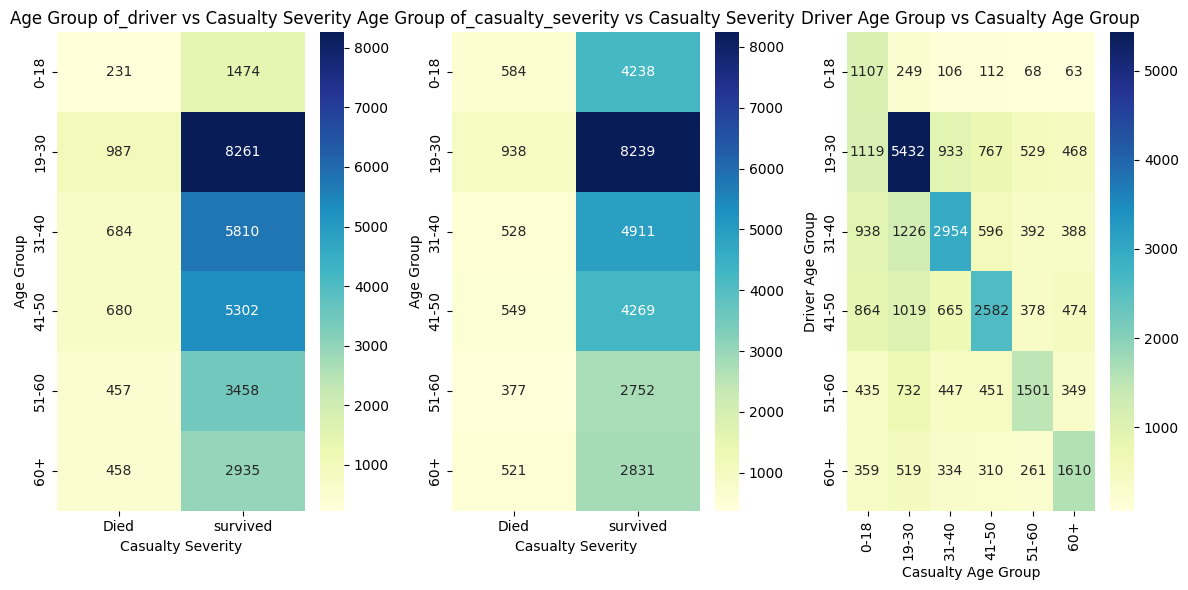

In [711]:
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
age_bins = pd.cut(df['age_of_driver'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])

heatmap_data = pd.crosstab(age_bins, df['casualty_severity'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Age Group of_driver vs Casualty Severity")
plt.xlabel("Casualty Severity")
plt.ylabel("Age Group")

plt.subplot(1,3,2)
age_bins = pd.cut(df['age_of_casualty'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])

heatmap_data = pd.crosstab(age_bins, df['casualty_severity'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Age Group of_casualty_severity vs Casualty Severity")
plt.xlabel("Casualty Severity")
plt.ylabel("Age Group")

plt.subplot(1,3,3)
age_bins = pd.cut(df['age_of_casualty'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])

driver_age_bins = pd.cut(df['age_of_driver'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])
casualty_age_bins = pd.cut(df['age_of_casualty'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])

heatmap_data = pd.crosstab(driver_age_bins, casualty_age_bins)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Driver Age Group vs Casualty Age Group")
plt.xlabel("Casualty Age Group")
plt.ylabel("Driver Age Group")

plt.tight_layout()
plt.show()

The figure showed that a high percentage of Casualty are between the ages of 19 and 30

## Question 3: What is the relationship between the age of the car and the severity of the injury?

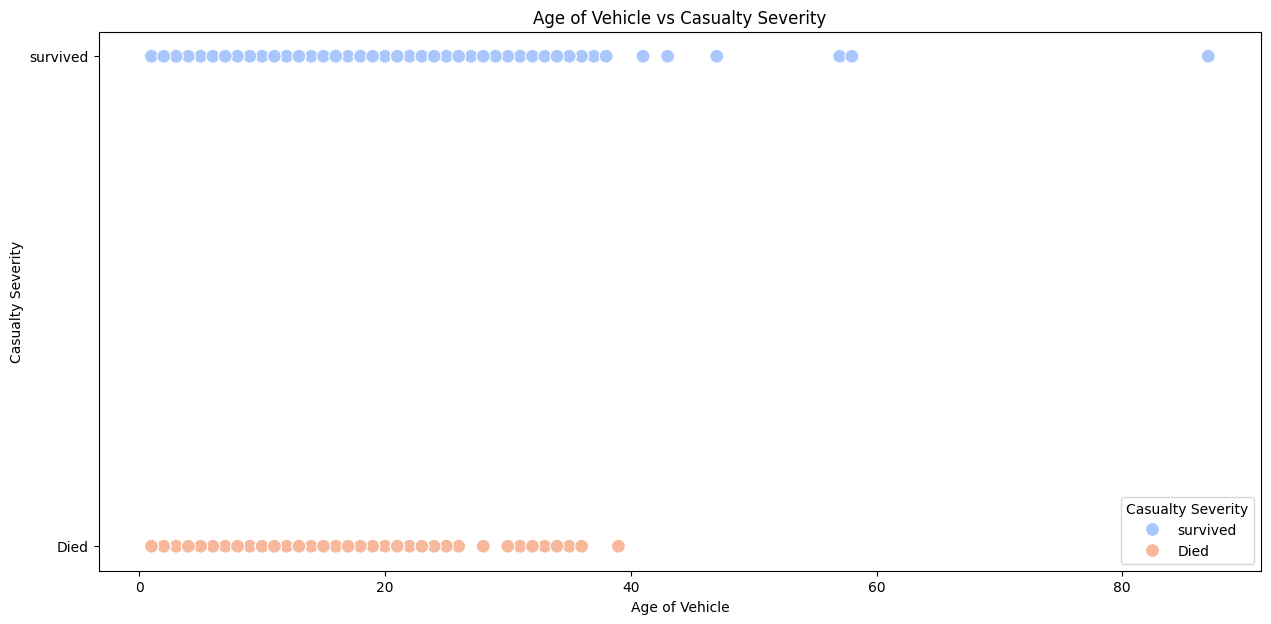

In [712]:
plt.figure(figsize=(15, 7)) 
sns.scatterplot(data=df, x='age_of_vehicle', y='casualty_severity', hue='casualty_severity', palette='coolwarm', s=100)
plt.title('Age of Vehicle vs Casualty Severity')
plt.xlabel('Age of Vehicle')
plt.ylabel('Casualty Severity')
plt.legend(title='Casualty Severity')
plt.show()


The figure showed that the highest percentage of Casualty is among Vehicle of lesser age

## Question 4: Does the location of the accident at the intersection affect the severity of the injury?

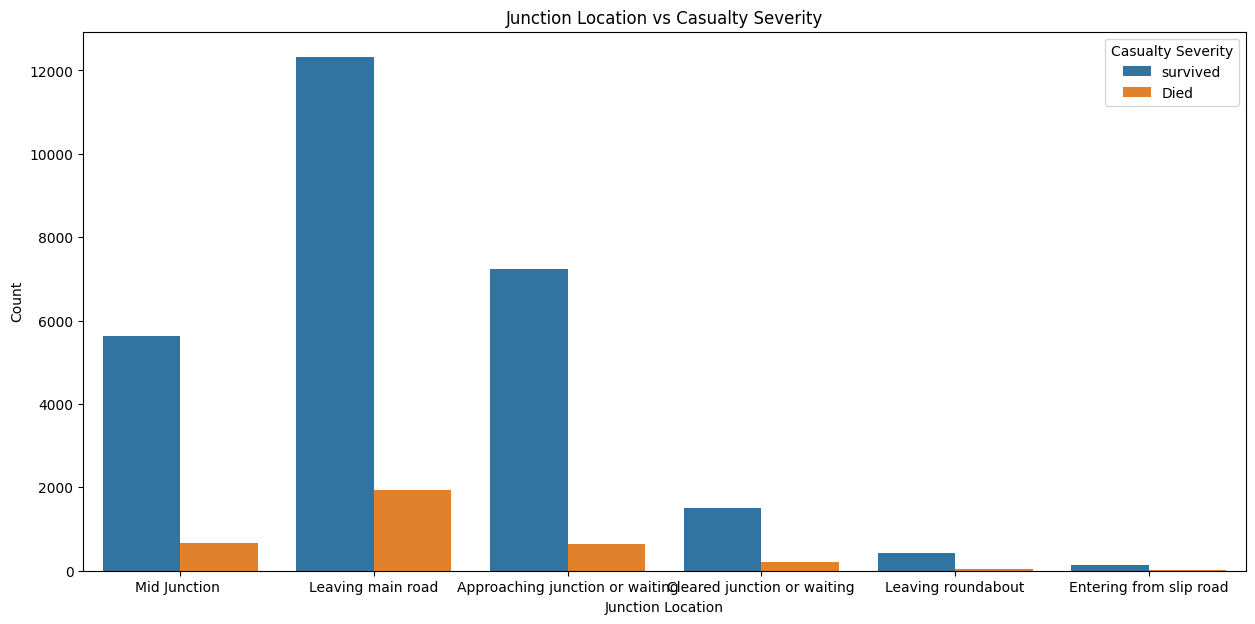

In [713]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='junction_location', hue='casualty_severity')
plt.title('Junction Location vs Casualty Severity')
plt.xlabel('Junction Location')
plt.ylabel('Count')
plt.legend(title='Casualty Severity')
plt.show()

The graph showed that the highest percentage of accidents occurs on the leaving main road

## Question 5: How does the type of victim (driver, passenger, pedestrian) affect the severity of the injury?

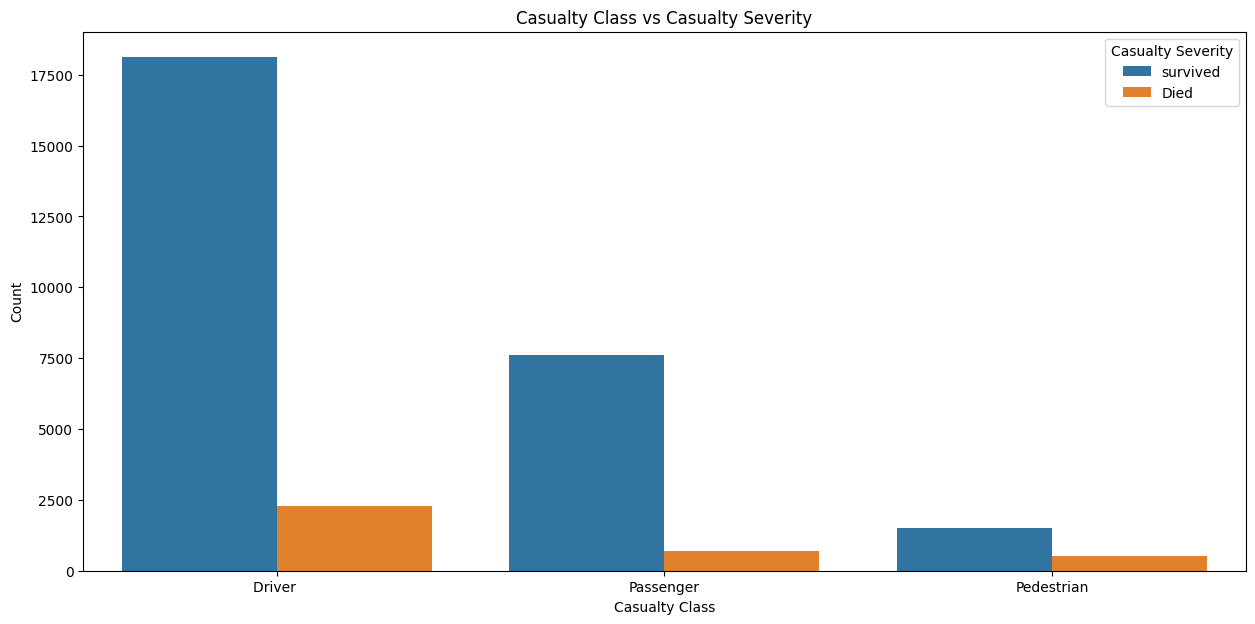

In [714]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='casualty_class', hue='casualty_severity')
plt.title('Casualty Class vs Casualty Severity')
plt.xlabel('Casualty Class')
plt.ylabel('Count')
plt.legend(title='Casualty Severity')
plt.show()

The figure showed that drivers are the group most vulnerable to accidents

## Question 6: Is there a relationship between the victim's age, gender, and severity of injury?

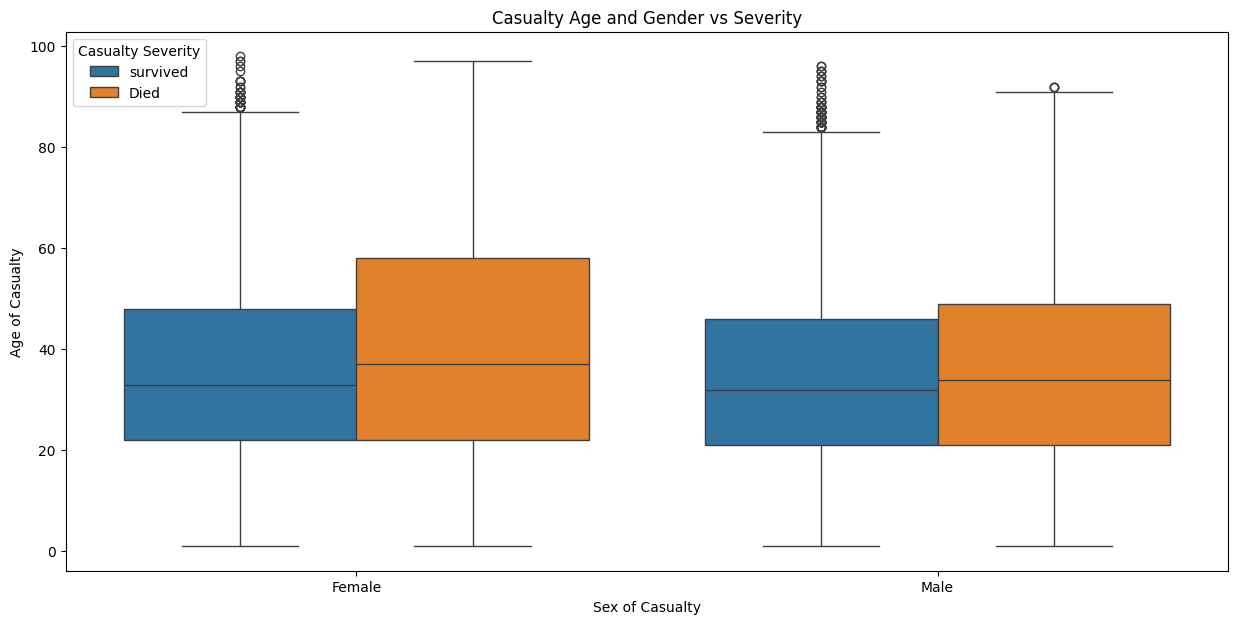

In [715]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='sex_of_casualty', y='age_of_casualty', hue='casualty_severity')
plt.title('Casualty Age and Gender vs Severity')
plt.xlabel('Sex of Casualty')
plt.ylabel('Age of Casualty')
plt.legend(title='Casualty Severity')
plt.show()

Data showed that females over the age of 40 are more vulnerable to fatal accidents, so focus can be placed on improving safety for female passengers.

## Question 7: Does the driver's residential area type (driver_home_area_type) affect the severity of accidents?

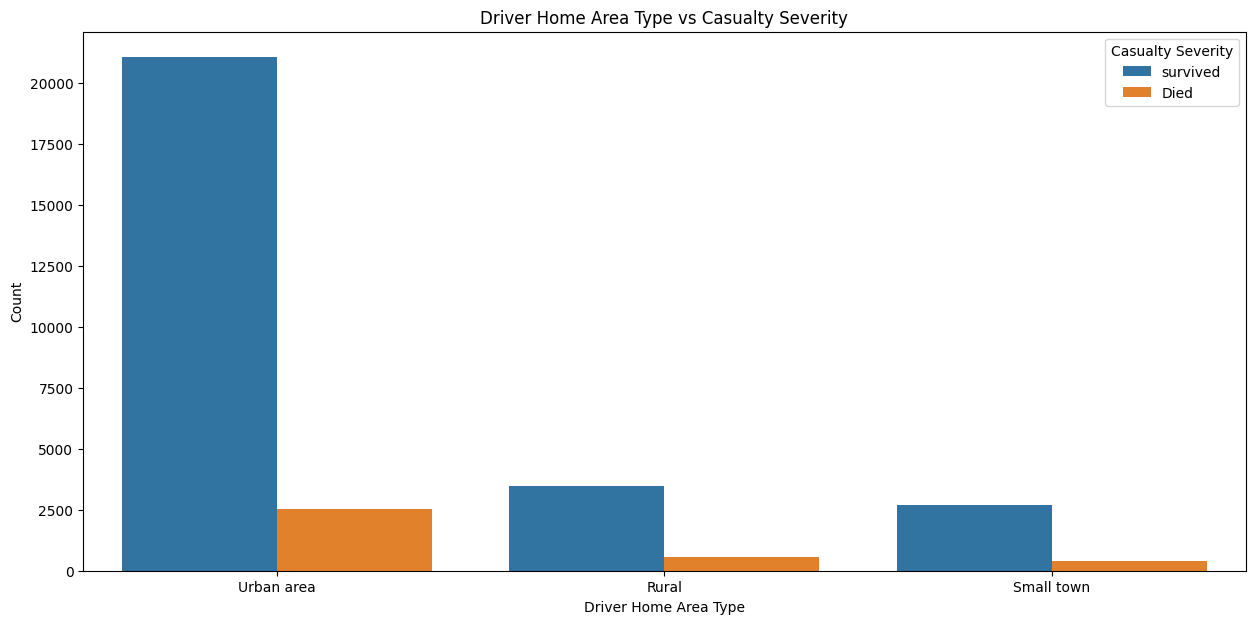

In [716]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='driver_home_area_type', hue='casualty_severity')
plt.title('Driver Home Area Type vs Casualty Severity')
plt.xlabel('Driver Home Area Type')
plt.ylabel('Count')
plt.legend(title='Casualty Severity')
plt.show()

The drawing shows that the urban area is more vulnerable to fatal accidents, so awareness and attention must be paid to urban areas.

## Question 8: What is the relationship between the driver's trip purpose (journey_purpose_of_driver) and the severity of the accident?

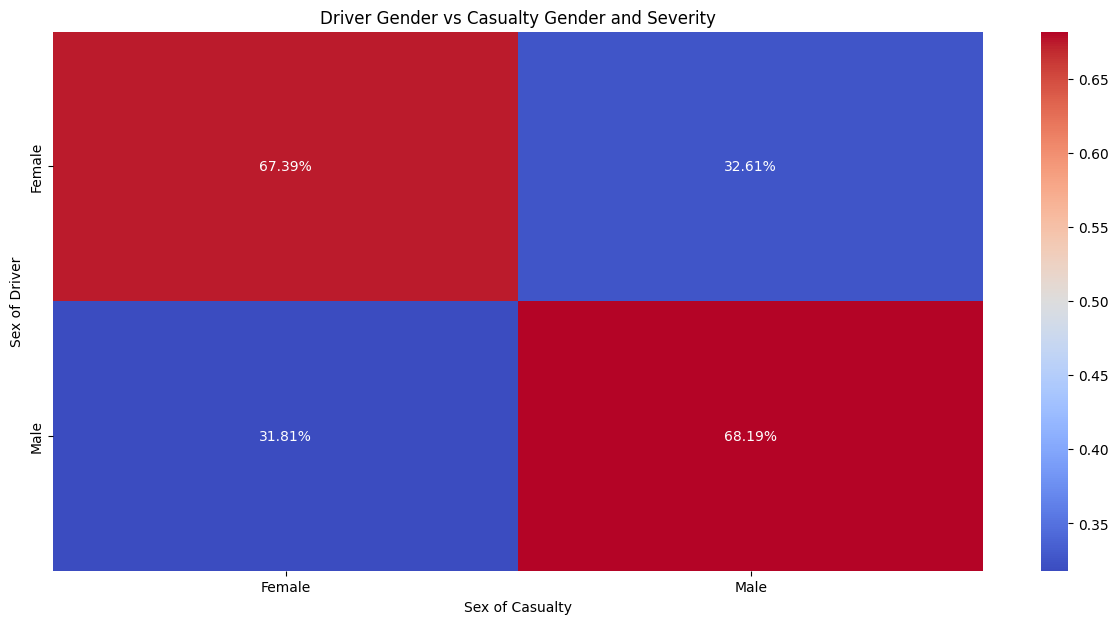

In [717]:
plt.figure(figsize=(15, 7))
sns.heatmap(pd.crosstab(df['sex_of_driver'], df['sex_of_casualty'], normalize='index'), annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Driver Gender vs Casualty Gender and Severity')
plt.xlabel('Sex of Casualty')
plt.ylabel('Sex of Driver')
plt.show()

The figure showed that the severity of the accident is greater in accidents in which the sex of the driver and the sex of the casualty are of the same gender.

# AI Classification

In [718]:
df_AI=df.copy()
label_encoder = LabelEncoder()
for column in df_AI.select_dtypes(include=['object']).columns:
    df_AI[column] = label_encoder.fit_transform(df_AI[column])
df_AI.head()

,vehicle_type,vehicle_manoeuvre,junction_location,hit_object_in_carriageway,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_of_vehicle,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
0,2,9,5,6,1,1,36,3,2,0,0,41,1
1,2,0,5,6,1,1,49,3,2,1,0,24,1
2,2,7,3,6,1,1,36,13,0,0,1,36,1
3,2,4,3,4,1,1,38,7,2,2,0,49,0
4,2,0,5,6,4,1,59,2,2,0,1,23,1


In [719]:
df_AI.describe()

,vehicle_type,vehicle_manoeuvre,junction_location,hit_object_in_carriageway,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_of_vehicle,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
count,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000
mean,2.511891,3.041221,2.541074,5.934964,1.176888,0.665062,39.284673,7.246348,1.636790,0.402089,0.562742,35.961317,0.886228
std,1.374096,3.260433,1.775429,0.542896,1.055020,0.471977,15.875144,4.480599,0.702609,0.609966,0.496056,18.103730,0.317539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,6.000000,1.000000,0.000000,26.000000,4.000000,2.000000,0.000000,0.000000,22.000000,1.000000
50%,2.000000,3.000000,3.000000,6.000000,1.000000,1.000000,37.000000,7.000000,2.000000,0.000000,1.000000,33.000000,1.000000
75%,2.000000,6.000000,3.000000,6.000000,1.000000,1.000000,50.000000,10.000000,2.000000,1.000000,1.000000,48.000000,1.000000
max,7.000000,10.000000,5.000000,9.000000,4.000000,1.000000,96.000000,87.000000,2.000000,2.000000,1.000000,98.000000,1.000000


In [720]:
columns_to_normalize = ['age_of_driver', 'age_of_vehicle','age_of_casualty']

for column in columns_to_normalize:
    df_AI[column] = (df_AI[column] - df_AI[column].min()) / (df_AI[column].max() - df_AI[column].min())

In [721]:
df_AI.describe()


,vehicle_type,vehicle_manoeuvre,junction_location,hit_object_in_carriageway,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_of_vehicle,driver_home_area_type,casualty_class,sex_of_casualty,age_of_casualty,casualty_severity
count,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000,30737.000000
mean,2.511891,3.041221,2.541074,5.934964,1.176888,0.665062,0.308350,0.072632,1.636790,0.402089,0.562742,0.360426,0.886228
std,1.374096,3.260433,1.775429,0.542896,1.055020,0.471977,0.193599,0.052100,0.702609,0.609966,0.496056,0.186636,0.317539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.146341,0.034884,2.000000,0.000000,0.000000,0.216495,1.000000
50%,2.000000,3.000000,3.000000,6.000000,1.000000,1.000000,0.280488,0.069767,2.000000,0.000000,1.000000,0.329897,1.000000
75%,2.000000,6.000000,3.000000,6.000000,1.000000,1.000000,0.439024,0.104651,2.000000,1.000000,1.000000,0.484536,1.000000
max,7.000000,10.000000,5.000000,9.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [722]:
data_in=df_AI.drop('casualty_severity',axis=1)
data_out=df_AI['casualty_severity']
x_train,x_test,y_train,y_test=train_test_split(data_in,data_out,test_size=0.3,random_state=42)

In [723]:

rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1-Score: ", f1_score(y_test, y_pred_rf))



Random Forest Accuracy: 88.43%
Accuracy:  0.8842984168293212
Precision:  0.8855807888731935
Recall:  0.9982851543361098
F1-Score:  0.9385616398917487
